# Feature Engineering

In [91]:
# Importing the necessary Python libraries
import warnings
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from category_encoders.one_hot import OneHotEncoder

# Hiding any warnings
warnings.filterwarnings('ignore')

# Adjusting Pandas output
pd.set_option("display.max_columns", None)

In [2]:
# Import our dataset
df = pd.read_csv('../data/raw/all_data.csv')

In [6]:
# Temporarily dropping the rt_audience_score column
df.drop(columns = ['rt_audience_score'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_name          122 non-null    object 
 1   biehn_scale_rating  121 non-null    float64
 2   biehn_yes_or_no     121 non-null    object 
 3   tmdb_id             122 non-null    int64  
 4   imdb_id             122 non-null    object 
 5   budget              122 non-null    int64  
 6   primary_genre       121 non-null    object 
 7   secondary_genre     109 non-null    object 
 8   tmdb_popularity     122 non-null    float64
 9   revenue             122 non-null    int64  
 10  runtime             122 non-null    int64  
 11  tmdb_vote_average   122 non-null    float64
 12  tmdb_vote_count     122 non-null    int64  
 13  imdb_rating         122 non-null    float64
 14  imdb_votes          122 non-null    float64
 15  year                122 non-null    int64  
 16  rt_criti

In [14]:
af1_index = df.index[df['movie_name'] == 'Air Force One'].tolist()

In [16]:
df.drop(labels = af1_index, axis = 0, inplace = True)

In [17]:
df['movie_name'] == 'Air Force One'

0      False
1      False
2      False
3      False
4      False
       ...  
116    False
117    False
118    False
119    False
120    False
Name: movie_name, Length: 121, dtype: bool

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_name          121 non-null    object 
 1   biehn_scale_rating  121 non-null    float64
 2   biehn_yes_or_no     121 non-null    object 
 3   tmdb_id             121 non-null    int64  
 4   imdb_id             121 non-null    object 
 5   budget              121 non-null    int64  
 6   primary_genre       120 non-null    object 
 7   secondary_genre     108 non-null    object 
 8   tmdb_popularity     121 non-null    float64
 9   revenue             121 non-null    int64  
 10  runtime             121 non-null    int64  
 11  tmdb_vote_average   121 non-null    float64
 12  tmdb_vote_count     121 non-null    int64  
 13  imdb_rating         121 non-null    float64
 14  imdb_votes          121 non-null    float64
 15  year                121 non-null    int64  
 16  rt_criti

In [21]:
df['biehn_yes_or_no'].value_counts()

Yes    95
No     26
Name: biehn_yes_or_no, dtype: int64

In [23]:
df_sample = df.head()

In [31]:
# Performing the encoding of the "biehn_yes_or_no" feature
for index, row in df.iterrows():
    movie_name = row['movie_name']
    if row['biehn_yes_or_no'] == 'Yes':
        df.loc[index, 'biehn_yes_or_no'] = 1
    elif row['biehn_yes_or_no'] == 'No':
        df.loc[index, 'biehn_yes_or_no'] = 0

In [35]:
df['biehn_yes_or_no'].value_counts()

1    95
0    26
Name: biehn_yes_or_no, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_name          121 non-null    object 
 1   biehn_scale_rating  121 non-null    float64
 2   biehn_yes_or_no     121 non-null    object 
 3   budget              121 non-null    int64  
 4   primary_genre       120 non-null    object 
 5   secondary_genre     108 non-null    object 
 6   tmdb_popularity     121 non-null    float64
 7   revenue             121 non-null    int64  
 8   runtime             121 non-null    int64  
 9   tmdb_vote_average   121 non-null    float64
 10  tmdb_vote_count     121 non-null    int64  
 11  imdb_rating         121 non-null    float64
 12  imdb_votes          121 non-null    float64
 13  year                121 non-null    int64  
 14  rt_critic_score     109 non-null    object 
 15  metascore           111 non-null    float64
dtypes: float

In [37]:
df.drop(columns = ['tmdb_id', 'imdb_id'], inplace = True)

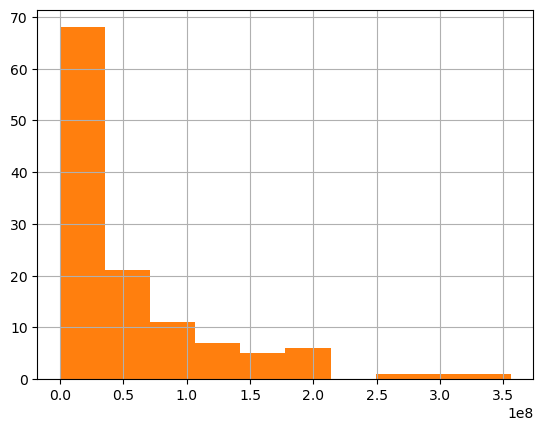

In [44]:
df['budget'].hist()
plt.show()

In [45]:
df.sort_values(by = 'budget')

,movie_name,biehn_scale_rating,biehn_yes_or_no,budget,primary_genre,secondary_genre,tmdb_popularity,revenue,runtime,tmdb_vote_average,tmdb_vote_count,imdb_rating,imdb_votes,year,rt_critic_score,metascore
85,The Silence,0.9,0,0,Horror,Drama,19.998,2325977,91,6.1,1102,5.3,41867.0,1997,29%,25.0
64,Raw,6.0,0,0,Thriller,Action,10.639,0,95,4.8,19,4.1,1285.0,1997,NaN,NaN
34,Imperium,7.0,1,0,Crime,Drama,16.452,35000,109,6.5,1022,6.5,44334.0,1997,85%,68.0
94,El Camino,6.1,1,0,Animation,Family,84.812,0,85,6.8,75,5.2,463.0,1997,NaN,NaN
95,Midsomer,3.2,0,0,Crime,NaN,1.400,0,93,6.0,2,7.5,616.0,1997,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Black Panther,7.5,1,200000000,Action,Adventure,111.614,1346739107,134,7.4,18024,7.3,680835.0,1997,96%,88.0
27,"Guardians of the Galaxy, Vol. 2",4.5,0,200000000,Adventure,Action,91.837,863756051,137,7.6,17261,7.6,614196.0,1997,85%,67.0
8,Captain America: Civil War,8.0,1,250000000,Adventure,Action,138.416,1153296293,147,7.4,18710,7.8,712648.0,1997,90%,75.0
50,Avengers: Infinity War,8.0,1,300000000,Adventure,Action,305.805,2046239637,149,8.3,22892,8.4,932048.0,1997,85%,68.0


In [46]:
df['budget'].value_counts()

0            26
10000000      8
40000000      5
125000000     3
200000000     3
             ..
178000000     1
1000000       1
4800000       1
62770198      1
72500000      1
Name: budget, Length: 66, dtype: int64

In [55]:
# Defining the OneHotEncoders for the genre columns
primary_genre_encoder = OneHotEncoder(use_cat_names = True, handle_unknown = 'ignore')
secondary_genre_encoder = OneHotEncoder(use_cat_names = True, handle_unknown = 'ignore')

In [56]:
# Getting the one-hot encoded dummies for each of the genre columns
primary_genre_dummies = primary_genre_encoder.fit_transform(df['primary_genre'])
secondary_genre_dummies = secondary_genre_encoder.fit_transform(df['secondary_genre'])

In [59]:
# Concatenating the genre dummies to the original dataframe
df = pd.concat([df, primary_genre_dummies, secondary_genre_dummies], axis = 1)

In [60]:
# Dropping the original genre columns
df.drop(columns = ['primary_genre', 'secondary_genre'], inplace = True)

In [67]:
df.head()

,movie_name,biehn_scale_rating,biehn_yes_or_no,budget,tmdb_popularity,revenue,runtime,tmdb_vote_average,tmdb_vote_count,imdb_rating,imdb_votes,year,rt_critic_score,metascore,primary_genre_Comedy,primary_genre_Crime,primary_genre_Action,primary_genre_Drama,primary_genre_Adventure,primary_genre_Documentary,primary_genre_Family,primary_genre_Western,primary_genre_Horror,primary_genre_Mystery,primary_genre_Thriller,primary_genre_War,primary_genre_Fantasy,primary_genre_Science Fiction,primary_genre_Music,primary_genre_Animation,primary_genre_nan,secondary_genre_nan,secondary_genre_Drama,secondary_genre_Adventure,secondary_genre_Science Fiction,secondary_genre_Action,secondary_genre_Family,secondary_genre_History,secondary_genre_Animation,secondary_genre_Crime,secondary_genre_Thriller,secondary_genre_Horror,secondary_genre_Fantasy,secondary_genre_Mystery,secondary_genre_Comedy,secondary_genre_Romance,secondary_genre_Music
0,Zoolander 2,7.0,1,50000000,13.513,55969000,100,4.8,1781,4.7,67252.0,1997,22%,34.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Dope,8.5,1,700000,15.086,17986781,103,7.1,1185,7.2,82945.0,1997,88%,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Big Short,8.0,1,28000000,23.804,133346506,131,7.3,6952,7.8,392827.0,1997,89%,81.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Deadpool,10.0,1,58000000,153.448,783100000,108,7.6,25645,8.0,953328.0,1997,85%,65.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,The Martian,8.0,1,108000000,82.855,630161890,142,7.7,16183,8.0,798482.0,1997,91%,80.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   movie_name                       121 non-null    object 
 1   biehn_scale_rating               121 non-null    float64
 2   biehn_yes_or_no                  121 non-null    object 
 3   budget                           121 non-null    int64  
 4   tmdb_popularity                  121 non-null    float64
 5   revenue                          121 non-null    int64  
 6   runtime                          121 non-null    int64  
 7   tmdb_vote_average                121 non-null    float64
 8   tmdb_vote_count                  121 non-null    int64  
 9   imdb_rating                      121 non-null    float64
 10  imdb_votes                       121 non-null    float64
 11  year                             121 non-null    int64  
 12  rt_critic_score       

In [70]:
df[['tmdb_popularity']]

,tmdb_popularity
0,13.513
1,15.086
2,23.804
3,153.448
4,82.855
...,...
116,55.920
117,16.873
118,13.873
119,37.811


In [71]:
# Dropping the tmdb_popularity column as it appears to be highly variable per the day it was pulled
df.drop(columns = ['tmdb_popularity'], inplace = True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   movie_name                       121 non-null    object 
 1   biehn_scale_rating               121 non-null    float64
 2   biehn_yes_or_no                  121 non-null    object 
 3   budget                           121 non-null    int64  
 4   revenue                          121 non-null    int64  
 5   runtime                          121 non-null    int64  
 6   tmdb_vote_average                121 non-null    float64
 7   tmdb_vote_count                  121 non-null    int64  
 8   imdb_rating                      121 non-null    float64
 9   imdb_votes                       121 non-null    float64
 10  year                             121 non-null    int64  
 11  rt_critic_score                  109 non-null    object 
 12  metascore             

In [76]:
df[['tmdb_vote_average', 'tmdb_vote_count']]

,tmdb_vote_average,tmdb_vote_count
0,4.8,1781
1,7.1,1185
2,7.3,6952
3,7.6,25645
4,7.7,16183
...,...,...
116,6.5,1940
117,7.3,1829
118,5.7,561
119,6.7,2552


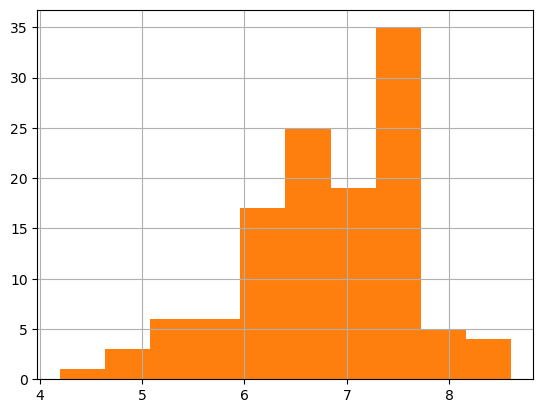

In [78]:
df['tmdb_vote_average'].hist()
plt.show()

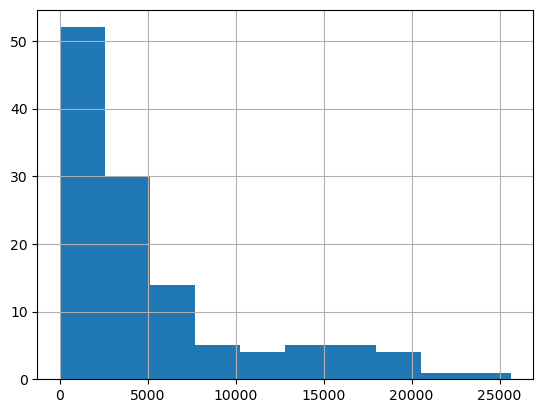

In [79]:
df['tmdb_vote_count'].hist()
plt.show()

In [80]:
df.sort_values(by = 'tmdb_vote_count')

,movie_name,biehn_scale_rating,biehn_yes_or_no,budget,revenue,runtime,tmdb_vote_average,tmdb_vote_count,imdb_rating,imdb_votes,year,rt_critic_score,metascore,primary_genre_Comedy,primary_genre_Crime,primary_genre_Action,primary_genre_Drama,primary_genre_Adventure,primary_genre_Documentary,primary_genre_Family,primary_genre_Western,primary_genre_Horror,primary_genre_Mystery,primary_genre_Thriller,primary_genre_War,primary_genre_Fantasy,primary_genre_Science Fiction,primary_genre_Music,primary_genre_Animation,primary_genre_nan,secondary_genre_nan,secondary_genre_Drama,secondary_genre_Adventure,secondary_genre_Science Fiction,secondary_genre_Action,secondary_genre_Family,secondary_genre_History,secondary_genre_Animation,secondary_genre_Crime,secondary_genre_Thriller,secondary_genre_Horror,secondary_genre_Fantasy,secondary_genre_Mystery,secondary_genre_Comedy,secondary_genre_Romance,secondary_genre_Music
95,Midsomer,3.2,0,0,0,93,6.0,2,7.5,616.0,1997,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,The Platform,7.4,1,0,0,101,7.0,3,6.3,23.0,1997,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64,Raw,6.0,0,0,0,95,4.8,19,4.1,1285.0,1997,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
97,Midnight Family,6.1,1,0,0,81,7.3,49,7.4,1676.0,1997,97%,81.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,Ladybird,5.0,1,0,0,101,7.3,58,7.4,3416.0,1997,75%,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,Captain America: Civil War,8.0,1,250000000,1153296293,147,7.4,18710,7.8,712648.0,1997,90%,75.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
93,Joker,9.6,1,55000000,1074251311,122,8.2,18833,8.4,1080280.0,1997,68%,59.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
86,Avengers: Endgame,9.7,1,356000000,2797800564,181,8.3,19306,8.4,949813.0,1997,94%,78.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
50,Avengers: Infinity War,8.0,1,300000000,2046239637,149,8.3,22892,8.4,932048.0,1997,85%,68.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   movie_name                       121 non-null    object 
 1   biehn_scale_rating               121 non-null    float64
 2   biehn_yes_or_no                  121 non-null    object 
 3   budget                           121 non-null    int64  
 4   revenue                          121 non-null    int64  
 5   runtime                          121 non-null    int64  
 6   tmdb_vote_average                121 non-null    float64
 7   tmdb_vote_count                  121 non-null    int64  
 8   imdb_rating                      121 non-null    float64
 9   imdb_votes                       121 non-null    float64
 10  year                             121 non-null    int64  
 11  rt_critic_score                  109 non-null    object 
 12  metascore             

In [84]:
df[['imdb_rating', 'imdb_votes']]

,imdb_rating,imdb_votes
0,4.7,67252.0
1,7.2,82945.0
2,7.8,392827.0
3,8.0,953328.0
4,8.0,798482.0
...,...,...
116,6.2,68938.0
117,7.4,133505.0
118,5.6,40462.0
119,6.7,215912.0


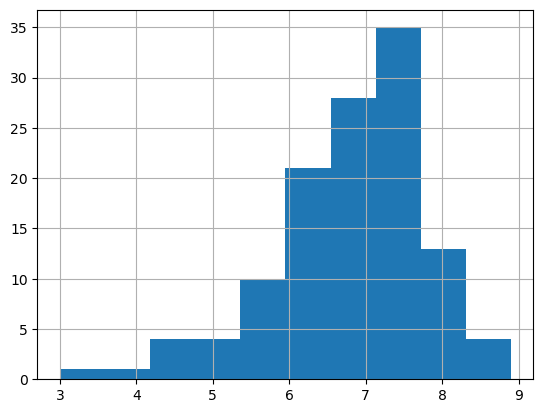

In [85]:
df['imdb_rating'].hist()
plt.show()

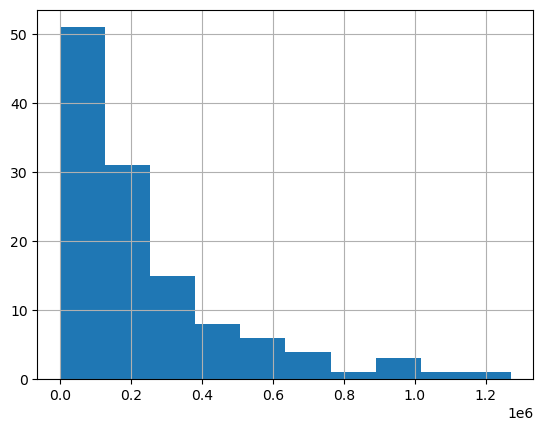

In [87]:
df['imdb_votes'].hist()
plt.show()

In [88]:
df.sort_values(by = 'imdb_votes')

,movie_name,biehn_scale_rating,biehn_yes_or_no,budget,revenue,runtime,tmdb_vote_average,tmdb_vote_count,imdb_rating,imdb_votes,year,rt_critic_score,metascore,primary_genre_Comedy,primary_genre_Crime,primary_genre_Action,primary_genre_Drama,primary_genre_Adventure,primary_genre_Documentary,primary_genre_Family,primary_genre_Western,primary_genre_Horror,primary_genre_Mystery,primary_genre_Thriller,primary_genre_War,primary_genre_Fantasy,primary_genre_Science Fiction,primary_genre_Music,primary_genre_Animation,primary_genre_nan,secondary_genre_nan,secondary_genre_Drama,secondary_genre_Adventure,secondary_genre_Science Fiction,secondary_genre_Action,secondary_genre_Family,secondary_genre_History,secondary_genre_Animation,secondary_genre_Crime,secondary_genre_Thriller,secondary_genre_Horror,secondary_genre_Fantasy,secondary_genre_Mystery,secondary_genre_Comedy,secondary_genre_Romance,secondary_genre_Music
100,The Platform,7.4,1,0,0,101,7.0,3,6.3,23.0,1997,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,El Camino,6.1,1,0,0,85,6.8,75,5.2,463.0,1997,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
95,Midsomer,3.2,0,0,0,93,6.0,2,7.5,616.0,1997,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64,Raw,6.0,0,0,0,95,4.8,19,4.1,1285.0,1997,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
97,Midnight Family,6.1,1,0,0,81,7.3,49,7.4,1676.0,1997,97%,81.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,Avengers: Infinity War,8.0,1,300000000,2046239637,149,8.3,22892,8.4,932048.0,1997,85%,68.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
86,Avengers: Endgame,9.7,1,356000000,2797800564,181,8.3,19306,8.4,949813.0,1997,94%,78.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Deadpool,10.0,1,58000000,783100000,108,7.6,25645,8.0,953328.0,1997,85%,65.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
93,Joker,9.6,1,55000000,1074251311,122,8.2,18833,8.4,1080280.0,1997,68%,59.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   movie_name                       121 non-null    object 
 1   biehn_scale_rating               121 non-null    float64
 2   biehn_yes_or_no                  121 non-null    object 
 3   budget                           121 non-null    int64  
 4   revenue                          121 non-null    int64  
 5   runtime                          121 non-null    int64  
 6   tmdb_vote_average                121 non-null    float64
 7   tmdb_vote_count                  121 non-null    int64  
 8   imdb_rating                      121 non-null    float64
 9   imdb_votes                       121 non-null    float64
 10  year                             121 non-null    int64  
 11  rt_critic_score                  109 non-null    object 
 12  metascore             

In [93]:
currentYear = datetime.now().year
currentYear

2021

In [98]:
# Engineering the "year" column to be a relative "movie_age" column based on number of years since original release
for index, row in df_sample.iterrows():
    movie_name = row['movie_name']
    year_released = row['year']
    movie_age = currentYear - year_released
    df_sample.loc[index, 'movie_age'] = movie_age

In [99]:
df_sample

,movie_name,biehn_scale_rating,biehn_yes_or_no,tmdb_id,imdb_id,budget,primary_genre,secondary_genre,tmdb_popularity,revenue,runtime,tmdb_vote_average,tmdb_vote_count,imdb_rating,imdb_votes,year,rt_critic_score,metascore,movie_age
0,Zoolander 2,7.0,1,329833,tt1608290,50000000,Comedy,NaN,13.513,55969000,100,4.8,1781,4.7,67252.0,1997,22%,34.0,24.0
1,Dope,8.5,1,308639,tt3850214,700000,Crime,Drama,15.086,17986781,103,7.1,1185,7.2,82945.0,1997,88%,72.0,24.0
2,The Big Short,8.0,1,318846,tt1596363,28000000,Comedy,Drama,23.804,133346506,131,7.3,6952,7.8,392827.0,1997,89%,81.0,24.0
3,Deadpool,10.0,1,293660,tt1431045,58000000,Action,Adventure,153.448,783100000,108,7.6,25645,8.0,953328.0,1997,85%,65.0,24.0
4,The Martian,8.0,1,286217,tt3659388,108000000,Drama,Adventure,82.855,630161890,142,7.7,16183,8.0,798482.0,1997,91%,80.0,24.0


In [97]:
df['year'].value_counts()

1997    121
Name: year, dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   movie_name                       121 non-null    object 
 1   biehn_scale_rating               121 non-null    float64
 2   biehn_yes_or_no                  121 non-null    object 
 3   budget                           121 non-null    int64  
 4   revenue                          121 non-null    int64  
 5   runtime                          121 non-null    int64  
 6   tmdb_vote_average                121 non-null    float64
 7   tmdb_vote_count                  121 non-null    int64  
 8   imdb_rating                      121 non-null    float64
 9   imdb_votes                       121 non-null    float64
 10  year                             121 non-null    int64  
 11  rt_critic_score                  109 non-null    object 
 12  metascore             

In [101]:
df[['rt_critic_score', 'metascore']]

,rt_critic_score,metascore
0,22%,34.0
1,88%,72.0
2,89%,81.0
3,85%,65.0
4,91%,80.0
...,...,...
116,77%,61.0
117,95%,83.0
118,14%,27.0
119,56%,47.0


In [112]:
# Removing percentage sign from RT critic score
for index, row in df.iterrows():
    if pd.notnull(row['rt_critic_score']):
        df.loc[index, 'rt_critic_score'] = int(row['rt_critic_score'][:2])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   movie_name                       121 non-null    object 
 1   biehn_scale_rating               121 non-null    float64
 2   biehn_yes_or_no                  121 non-null    object 
 3   budget                           121 non-null    int64  
 4   revenue                          121 non-null    int64  
 5   runtime                          121 non-null    int64  
 6   tmdb_vote_average                121 non-null    float64
 7   tmdb_vote_count                  121 non-null    int64  
 8   imdb_rating                      121 non-null    float64
 9   imdb_votes                       121 non-null    float64
 10  year                             121 non-null    int64  
 11  rt_critic_score                  109 non-null    object 
 12  metascore             

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   movie_name                       121 non-null    object 
 1   biehn_scale_rating               121 non-null    float64
 2   biehn_yes_or_no                  121 non-null    object 
 3   budget                           121 non-null    int64  
 4   revenue                          121 non-null    int64  
 5   runtime                          121 non-null    int64  
 6   tmdb_vote_average                121 non-null    float64
 7   tmdb_vote_count                  121 non-null    int64  
 8   imdb_rating                      121 non-null    float64
 9   imdb_votes                       121 non-null    float64
 10  year                             121 non-null    int64  
 11  rt_critic_score                  109 non-null    object 
 12  metascore             